Total no. of rows: 179079
Field names are:match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[7, 16, 6, 4, 9, 17, 5, 11, 9, 4, 10, 8, 18, 8, 19, 4, 7, 17, 12, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[11, 1, 16, 15, 5, 6, 7, 13, 11, 13, 13, 7, 8, 4, 9, 12, 3, 2, 9, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[11, 8, 9, 13, 7, 13, 2, 3, 10, 6, 10, 3, 11, 5, 9, 7, 10, 8, 9, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[8, 15, 12, 4, 4, 16, 4, 10, 9, 11, 4, 8, 9, 15, 10, 9, 10, 7, 7, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[8, 8, 6, 7, 11, 12, 12, 8, 4, 15, 4, 7, 7, 7, 9, 5, 11, 12, 16, 14]
[1, 2, 

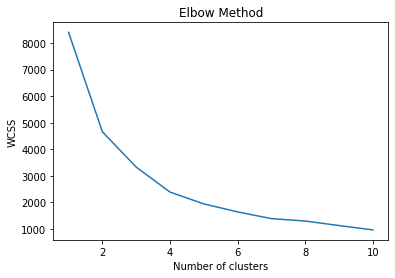

kmeans KMeans(n_clusters=7, random_state=0)
pred_y [4 0 4 4 4 0 2 1 1 2 1 1 6 3 6 3 3 5 5 5 0 4 0 0 4 4 2 1 1 1 1 2 3 3 3 5 3
 3 3 3 0 4 4 0 4 0 2 2 1 2 1 2 1 3 3 3 3 3 3 6 4 0 0 4 4 0 2 1 1 1 2 1 1 5
 3 3 3 3 3 5 4 4 4 4 0 0 0 2 2 1 2 2 3 3 3 3 5 5 5 5 4 0 0 4 4 0 6 2 2 2 1
 5 3 3 6 4 4 4 0 0 2 2 2 2 1 1 2 1 5 3 5 3 3 5 5 4 0 4 0 0 4 2 2 2 2 1 2 5
 5 5 5 3 5 3]


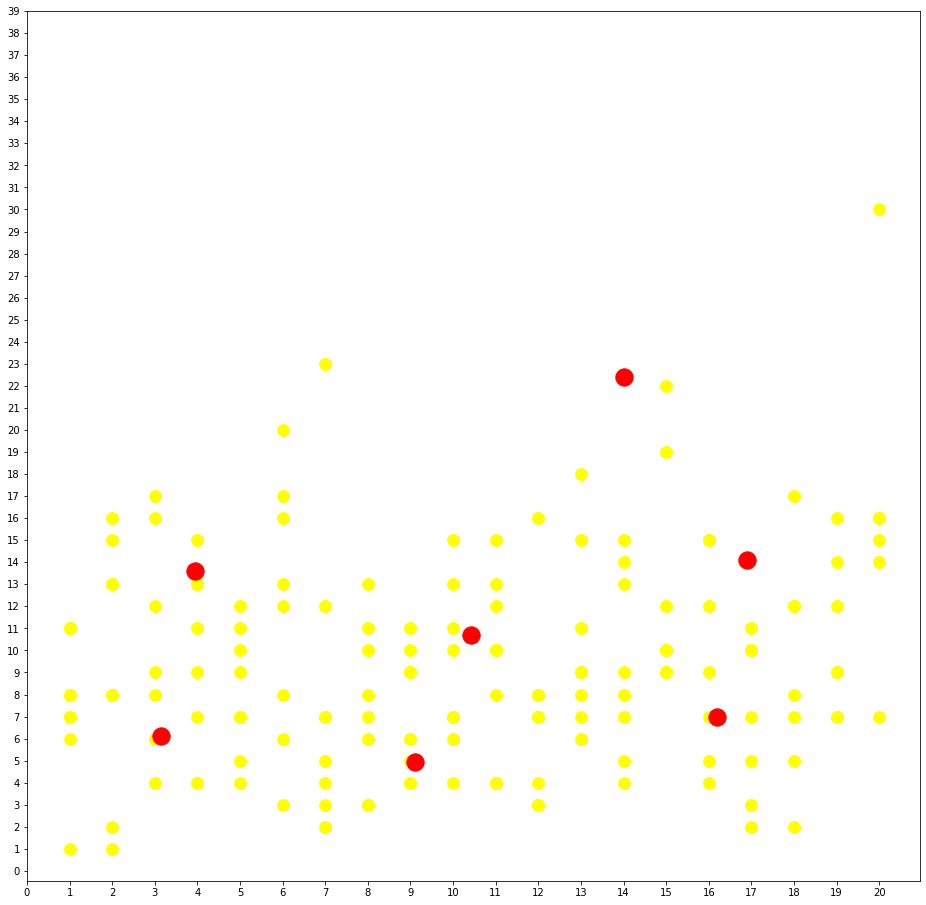

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np
from sklearn.cluster import KMeans
r=list()
o=list()
X=list()
filename = "deliveries.csv"
fields = []
rows = []

with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    fields = next(csvreader)
    
    for row in csvreader:
        rows.append(row)
    print("Total no. of rows: %d"%(csvreader.line_num)) 

print('Field names are:' + ', '.join(field for field in fields))

rowso=list()
fields0=list()
fields0.append('MATCH')
for x in range(1,21):
    fields0.append(x)
    
minn=0
match=''
for e in range(0,8):
    flag=0
    over=list()
    runs=list()
    min1=minn
    #print(min1)
    flag2=0
    for i in range(min1,2000) :
        
            
        
        if((int(rows[i][4])==20) ):
           
            match=rows[i][0]+rows[i][1]+rows[i][2]
            flag=1
        if((int(rows[i][4])!=1 and int(rows[i+1][4])==1)):
            match='Match'+rows[i][0]+' INNINGS '+rows[i][1]+' TEAM '+rows[i][2]
            flag2=1
            
        if(flag==1 and int(rows[i][4])!=20):
             break
        if(flag2==1 and int(rows[i][4])==1):
            break
            
        
        over.append(int(rows[i][4]))
        
     
        runs.append(int(rows[i][17]))
        minn+=1
       
    
    x=list()
    y=list()
    i=1
    total=int(runs[0])
    x.append(int(over[0]))
    while(i<len(over)):
        if(over[i]!=over[i-1]):
            x.append(int(over[i]))
            y.append(int(total))
            total=int(runs[i])
        else:
            total=total+int(runs[i])
            if(i==len(over)-1):
                y.append(total)
        i+=1
    
    print(x)
    for i in range(0,len(x)):
        o.append(x[i])
        
    print(y)
    for i in range(0,len(y)):
        r.append(y[i])
    for i in range(0,len(y)):
        X.append([x[i],y[i]])
  
    rowso.append(['',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]);
    rowso[e][0]=match
    for k in range(len(y)):
        rowso[e][k+1]=y[k]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.figure(figsize= (16,16))
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
print('kmeans',kmeans)
print('pred_y',pred_y)
plt.scatter(o,r, s=140,c='yellow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.yticks(np.arange(0, 40, 1))
plt.xticks(np.arange(0, 21, 1))

plt.show()